# **Layer 12**

## **Prepare Environment**

### Import libraries and modules



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### Load the dataset
*   Training Data
*   Validation Data
*   Test Data

In [2]:
# train_path = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer07\\train.csv'
# valid_path = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer07\\valid.csv'
# test_path = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer07\\test.csv'

train_path = './../data/layer 12/layer_12_train.csv'
valid_path = './../data/layer 12/layer_12_valid.csv'
test_path = './../data/layer 12/layer_12_test.csv'

train_data = pd.read_csv(train_path)

valid_data = pd.read_csv(valid_path)

test_data = pd.read_csv(test_path)

In [3]:
test_data = test_data.drop(columns=['label_1', 'label_2', 'label_3', 'label_4'])

### Dataset Info and split dataset according to the labels

In [4]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(28520, 772)
(750, 772)
(750, 768)


In [5]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.170378,0.237555,0.043467,0.098314,0.319561,-0.034903,0.273422,-0.181296,-0.130003,-0.050533,...,-0.599428,-0.040149,-0.039554,0.220258,0.253446,-0.029713,45,NaN,1,6
1,0.116804,0.272363,-0.053761,0.089773,0.272276,0.011914,0.208539,-0.223243,-0.353159,0.125565,...,-0.376731,-0.116969,-0.023879,0.376468,0.093542,0.012601,45,NaN,1,6
2,0.259977,0.373373,-0.266022,0.279235,0.392939,-0.095564,0.147236,-0.284521,-0.241698,0.023308,...,-0.503207,0.012953,-0.043270,0.252754,0.350915,-0.056625,45,NaN,1,6
3,0.124358,0.272876,-0.239626,0.192322,0.607384,0.179180,0.202379,-0.206914,0.095205,-0.027455,...,-0.225356,-0.162062,0.007676,0.291056,0.123154,-0.013536,45,NaN,1,6
4,0.050589,0.362734,-0.046245,0.067255,0.329067,-0.012923,0.098053,-0.187970,-0.309667,0.006264,...,-0.588841,0.013616,-0.029236,0.365545,0.111253,-0.065507,45,NaN,1,6


In [6]:
valid_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.153978,0.503276,0.022196,0.226684,0.466179,0.154995,0.195452,-0.288972,-0.297589,-0.008409,...,-0.503624,-0.056849,-0.117077,0.168611,0.373346,0.037188,45,NaN,1,6
1,0.056877,0.261613,0.050610,0.097744,0.322375,-0.011609,0.201331,-0.194763,-0.194228,-0.094267,...,-0.442110,0.008424,-0.067920,0.165600,0.333104,-0.270913,45,NaN,1,6
2,0.225439,0.350977,-0.295782,0.280168,0.705114,0.020545,0.390878,-0.322853,0.071575,0.013803,...,-0.380124,-0.089572,-0.023344,0.194312,0.269537,-0.292029,45,NaN,1,6
3,0.288556,0.513905,-0.205246,0.279660,0.469121,0.068339,0.131205,-0.338951,-0.270848,0.007799,...,-0.529678,-0.093194,-0.148418,0.405543,0.438906,-0.055119,45,NaN,1,6
4,0.165176,0.312492,-0.217504,0.259960,0.568979,-0.093011,0.257977,-0.277132,-0.172113,-0.025929,...,-0.504997,-0.108256,0.036867,0.267815,0.245041,0.117444,45,NaN,1,6


In [7]:
test_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.080591,0.164605,0.154187,0.043112,0.427232,-0.115058,0.222649,-0.186343,-0.246751,-0.036659,...,0.069021,0.074522,-0.074720,-0.256106,-0.512870,-0.041486,-0.023220,0.103020,0.288347,-0.173727
1,0.102958,0.188624,0.020285,-0.012674,0.361788,-0.009579,0.051360,-0.170510,-0.234939,0.015087,...,-0.178965,0.044130,-0.198727,-0.368367,-0.417991,-0.084467,-0.027814,0.338991,0.148317,-0.074232
2,0.313926,0.357592,-0.261225,0.241096,0.434547,0.097328,0.252501,-0.271017,-0.375891,0.085641,...,-0.302819,0.116413,-0.218482,-0.362626,-0.514325,-0.039517,-0.101682,0.213237,0.398050,-0.161745
3,0.021505,0.330326,0.100439,0.253199,0.531878,-0.083755,0.174284,-0.327236,-0.022677,-0.039493,...,-0.028008,0.064646,-0.055516,0.151823,-0.263436,-0.024832,-0.108900,0.065488,0.352082,-0.107765
4,0.171376,0.401234,-0.375235,0.355669,0.544285,-0.086168,0.149456,-0.217711,0.096350,-0.077529,...,0.049655,-0.016975,-0.173474,-0.194211,-0.366234,-0.023846,0.022874,0.345245,0.423611,-0.361004


Prepare training and validation data for each label

In [8]:
train_data_label1 = train_data.drop(columns=['label_2', 'label_3', 'label_4'])
train_data_label2 = train_data.drop(columns=['label_1', 'label_3', 'label_4'])
train_data_label3 = train_data.drop(columns=['label_1', 'label_2', 'label_4'])
train_data_label4 = train_data.drop(columns=['label_1', 'label_2', 'label_3'])

valid_data_label1 = valid_data.drop(columns=['label_2', 'label_3', 'label_4'])
valid_data_label2 = valid_data.drop(columns=['label_1', 'label_3', 'label_4'])
valid_data_label3 = valid_data.drop(columns=['label_1', 'label_2', 'label_4'])
valid_data_label4 = valid_data.drop(columns=['label_1', 'label_2', 'label_3'])

# Define Functions

## Feature Engineering

> *Train a model to predict the label 01 after appling some feature engineering techniques and methods to the training data.
Features are selected based on the correlation matrix and the PCA used to extract the features*

### Data Cleaning



> Remove null values for labels and determine missing values in features


**Drop** the rows where there are null values for the lables in the training dataset

In [9]:
def clean_null_labels(train_data_label1, label):
    print("Train set shape before: {}".format(train_data_label1.shape))

    train_features_null_counts = train_data_label1.drop(columns=[f'label_{label}']).isnull().sum()
    train_label_null_count = train_data_label1[f'label_{label}'].isnull().sum()
    print("Null value counts of the features\n{}".format(train_features_null_counts))
    print("Null value count: {}".format(train_label_null_count))

    cleaned = train_data_label1.dropna(subset=train_data_label1.columns[-1:], how='any')
    print("Train set shape after: {}".format(cleaned.shape))
    return cleaned

Fill the null values in the features with their **means** in the datasets.

In [10]:
def fill_null_features(train_data_label1, valid_data_label1, test_data):
    train_data_label1 = train_data_label1.fillna(train_data_label1.mean())
    valid_data_label1 = valid_data_label1.fillna(valid_data_label1.mean())
    test_data = test_data.fillna(test_data.mean())
    return train_data_label1, valid_data_label1, test_data

Split the Features and Labels in the dataset

In [11]:
def split_features_labels(train_data_label1, valid_data_label1, test_data, label):
    train_features_label1 = train_data_label1.iloc[:, :-1]
    train_label1 = train_data_label1[f'label_{label}']

    valid_features_label1 = valid_data_label1.iloc[:, :-1]
    valid_label1 = valid_data_label1[f'label_{label}']

    test_features_label1 = test_data
    return train_features_label1, train_label1, valid_features_label1, valid_label1, test_features_label1

Label 01 distribution after cleaning

In [12]:
def plot_label(train_label1, label):    
    labels, counts = np.unique(train_label1, return_counts=True)

    plt.figure(figsize=(18, 3))
    plt.xticks(labels)
    plt.bar(labels, counts)
    plt.xlabel(f'label_{label}')
    plt.ylabel('Frequency')
    plt.title('Distribution of the Label')
    plt.show()

### Feature Standardization

> Standardize the features of the dataset using **Robust scaler**

In [13]:
def standardize_data(label, train_features_label1, valid_features_label1, test_features_label1, scaler=StandardScaler()): 
    standardized_train_features_label1 = scaler.fit_transform(train_features_label1)
    standardized_valid_features_label1 = scaler.transform(valid_features_label1)
    standardized_test_features_label1 = scaler.transform(test_features_label1)
    
    joblib.dump(scaler, f'./../saved_components/layer12/label_{label}/scaler.pkl')
    
    return standardized_train_features_label1, standardized_valid_features_label1, standardized_test_features_label1

### Feature Extraction

> Principal Componenet Analysis(PCA) used to extract the features that can explain the variance of the label to 95% and display the resulting explained variances of each PC

In [14]:
def apply_PCA(label, standardized_train_features_label1, standardized_valid_features_label1, standardized_test_features_label1, variance_threshold):

    pca = PCA(n_components=variance_threshold, svd_solver='full')

    pca_train_features_label1 = pca.fit_transform(standardized_train_features_label1)
    pca_valid_features_label1 = pca.transform(standardized_valid_features_label1)
    pca_test_features_label1 = pca.transform(standardized_test_features_label1)

    explained_variance_ratio_reduced = pca.explained_variance_ratio_

    plt.figure(figsize=(18, 10))
    plt.bar(range(1, pca_train_features_label1.shape[1] + 1), explained_variance_ratio_reduced)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio per Principal Component (Reduced)')
    plt.show()

    print("\nReduced Train feature matrix shape: {}".format(pca_train_features_label1.shape))
    print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label1.shape))
    print("Reduced test feature matrix shape: {}".format(pca_test_features_label1.shape))
    
    joblib.dump(pca, f'./../saved_components/layer12/label_{label}/pca.pkl')
    
    return pca_train_features_label1, pca_valid_features_label1, pca_test_features_label1

### Feature Selection

> Feature selection is typically performed in two ways: first, by checking for correlations among the features and removing highly correlated redundant features, and second, by assessing the correlations between the features and the label 01 and eliminating less related features with the label.

Get the correlation matrix of the training features

In [15]:
# correlation_matrix = pd.DataFrame(pca_train_features_label1).corr()

# mask = np.triu(np.ones_like(correlation_matrix))

# plt.figure(figsize=(12, 12))
# sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, mask=mask)
# plt.title("Correlation Matrix")
# plt.show()

Identify the highly corellated features in the features set and remove them from the features set

In [16]:
# print("Train features: {}".format(pca_train_features_label1.shape))
# print("Valid features: {}".format(pca_valid_features_label1.shape))
# print("Test features: {}".format(pca_test_features_label1.shape))

# correlation_threshold = 0.8

# highly_correlated = set()

# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
#             colname = correlation_matrix.columns[i]
#             highly_correlated.add(colname)

# print(highly_correlated)

# pca_train_features_label1 = pd.DataFrame(pca_train_features_label1).drop(columns=highly_correlated)
# pca_valid_features_label1 = pd.DataFrame(pca_valid_features_label1).drop(columns=highly_correlated)
# pca_test_features_label1 = pd.DataFrame(pca_test_features_label1).drop(columns=highly_correlated)


# print("Filtered train features: {}".format(pca_train_features_label1.shape))
# print("Filtered valid features: {}".format(pca_valid_features_label1.shape))
# print("Filtered test features: {}".format(pca_test_features_label1.shape))

Identify the highly correlated features with the label using the traning dataset and extract the features that are only highly correlated with the label

In [17]:
# print("Train features: {}".format(pca_train_features_label1.shape))
# print("Valid features: {}".format(pca_valid_features_label1.shape))
# print("Test features: {}".format(pca_test_features_label1.shape))

# correlation_with_target = pca_train_features_label1.corrwith(train_label1)

# correlation_threshold = 0.005

# highly_correlated_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold]

# print(highly_correlated_features)

# pca_train_features_label1 = pca_train_features_label1[highly_correlated_features.index]
# pca_valid_features_label1 = pca_valid_features_label1[highly_correlated_features.index]
# pca_test_features_label1 = pca_test_features_label1[highly_correlated_features.index]

# print("Filtered train features: {}".format(pca_train_features_label1.shape))
# print("Filtered valid features: {}".format(pca_valid_features_label1.shape))
# print("Filtered test features: {}".format(pca_test_features_label1.shape))

## Hyperparameter tuning

Define parameters for random search

In [18]:
def get_hyper_params():
    svm_grid_params = {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf','linear']
    }

    knn_grid_params = {
        'n_neighbors' : [3, 5, 7, 9, 11, 13],
        'weights' : ['uniform', 'distance'],
        'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming']
    }

    random_forest_grid_params = {
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }
    return svm_grid_params, knn_grid_params, random_forest_grid_params

Tune hyperparameters with the best method by testing severel methods and for several models

In [19]:
def tune_hyper_params(svm_grid_params, knn_grid_params, rf_grid_params, pca_train_features_label1, train_label1, rand=True):
    classification_models_params = [
        ('SVM', SVC(), svm_grid_params),
    #     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
    #     ('Random Forest', RandomForestClassifier(), rf_grid_params)
    ]

    for model_name, model, grid_params in classification_models_params:
        if rand:
            search = RandomizedSearchCV(
                estimator = model,
                param_distributions = grid_params,
                n_iter = 40, cv = 3, verbose=4, random_state=42, n_jobs = -1
            )
        else:
            search = HalvingGridSearchCV(
                estimator=model,
                param_grid=grid_params,
                cv=3,
                n_jobs=-1,
                factor=2,
                verbose=2
            )
        result = search.fit(pca_train_features_label1, train_label1)

        print(f"best score for {model_name} : {result.best_score_}")
        print(f"best hyper parameters for {model_name} : {result.best_params_}")

## Train the best performing model

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall and train

In [20]:
def train_model(label, pca_train_features_label1, train_label1, pca_valid_features_label1, valid_label1, svm=None, rf=None, knn=None):
    classification_models = [
        # ('K Neighbors', knn),
        # ('Random Forest', rf),
        ('SVM', svm)
        
    ]
    
    models = []

    for model_name, model in classification_models:
        num_features = pca_train_features_label1.shape[1]
        print(f"{model_name} is training for {num_features} number of features\n")
        
        models.append(model)
        # kf = KFold(n_splits=3, random_state=42, shuffle=True)
        # cross_val_scores = cross_val_score(model, pca_train_features_label1, train_label1, cv=kf, verbose=4)

        # print("CV Accuracy: %0.4f accuracy with a standard deviation of %0.2f" % (cross_val_scores.mean(), cross_val_scores.std()))
        # print("\n")
        model.fit(pca_train_features_label1, train_label1)
        
        joblib.dump(model, f'./../saved_components/layer12/label_{label}/model.pkl')
    
    return models

In [21]:
def get_test_result(pca_train_features_label1, train_label1, pca_test_features_label1, model): 
    model.fit(pca_train_features_label1, train_label1)
    return model.predict(pca_test_features_label1)

In [22]:
def create_csv(ID, pred_label1, destination):
  df = pd.DataFrame()

  df.insert(loc=0, column='ID', value=ID)
  df.insert(loc=1, column='label_1', value=pred_label1)

  df.to_csv(destination, index=False)

# Label 01

Train set shape before: (28520, 769)
Null value counts of the features
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_764    0
feature_765    0
feature_766    0
feature_767    0
feature_768    0
Length: 768, dtype: int64
Null value count: 0
Train set shape after: (28520, 769)


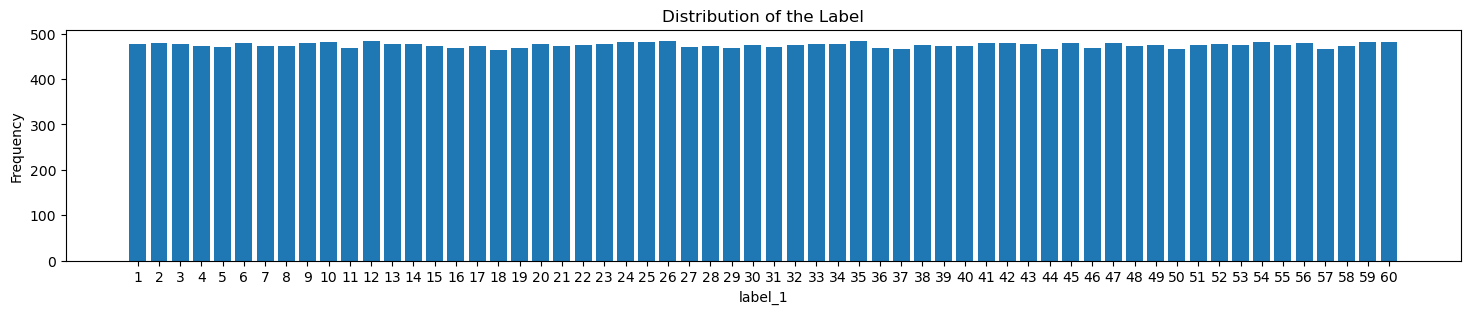

In [23]:
train_data_label1 = clean_null_labels(train_data_label1, 1)
train_data_label1, valid_data_label1, test_data = fill_null_features(train_data_label1, valid_data_label1, test_data)
train_features_label1, train_label1, valid_features_label1, valid_label1, test_features_label1 = split_features_labels(train_data_label1, valid_data_label1, test_data, 1)
plot_label(train_label1, 1)

In [24]:
standardized_train_features_label1, standardized_valid_features_label1, standardized_test_features_label1 = standardize_data(1, train_features_label1, valid_features_label1, test_features_label1, StandardScaler())

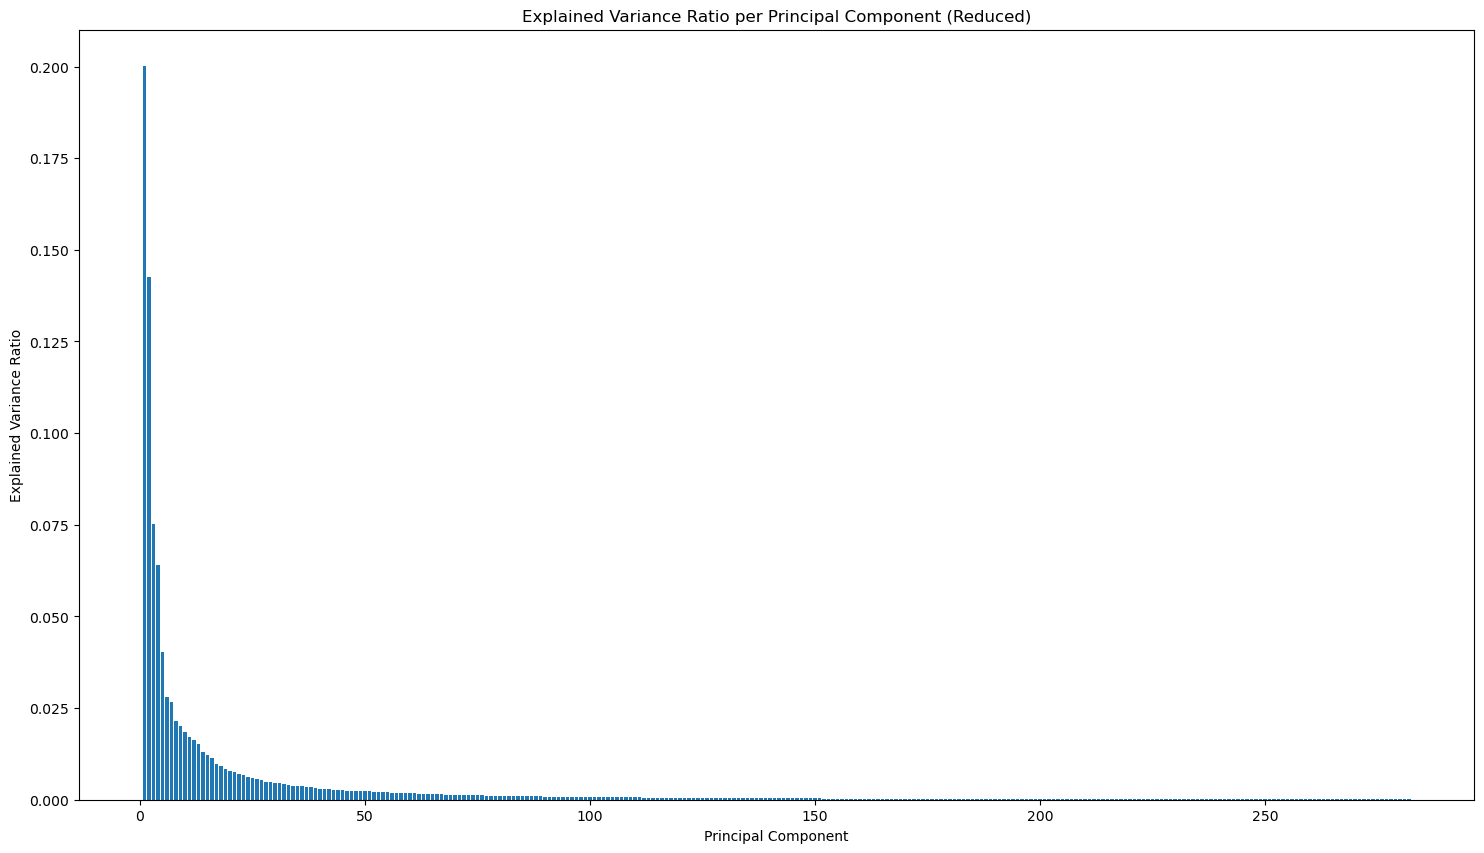


Reduced Train feature matrix shape: (28520, 282)
Reduced valid feature matrix shape: (750, 282)
Reduced test feature matrix shape: (750, 282)


In [25]:
pca_train_features_label1, pca_valid_features_label1, pca_test_features_label1 = apply_PCA(1, standardized_train_features_label1, standardized_valid_features_label1, standardized_test_features_label1, 0.99)

In [26]:
# svm_grid_params, knn_grid_params, random_forest_grid_params = get_hyper_params()
# tune_hyper_params(svm_grid_params, knn_grid_params, random_forest_grid_params, pca_train_features_label1, train_label1, rand=True)

In [27]:
model1 = train_model(1, standardized_train_features_label1, train_label1, standardized_valid_features_label1, valid_label1, SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced'))

SVM is training for 768 number of features



In [28]:
y_pred_test_label1 = get_test_result(standardized_train_features_label1, train_label1, standardized_test_features_label1, model1[0])

In [ ]:
destination = '/home/dakshina/Documents/MLProject/results/1.csv'

create_csv(test_IDs, y_pred_test_label1, destination)

# Label 02

Train set shape before: (28520, 769)
Null value counts of the features
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_764    0
feature_765    0
feature_766    0
feature_767    0
feature_768    0
Length: 768, dtype: int64
Null value count: 480
Train set shape after: (28040, 769)


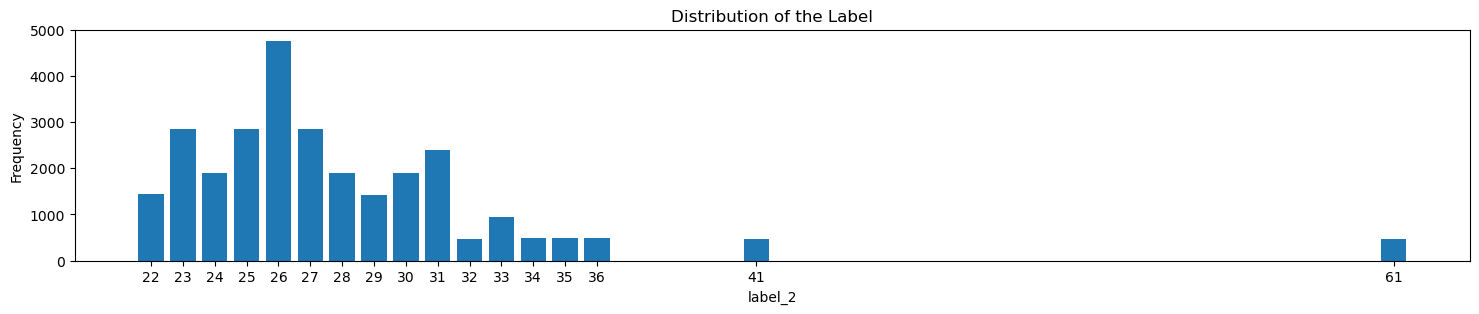

In [29]:
train_data_label2 = clean_null_labels(train_data_label2, 2)
train_data_label2, valid_data_label2, test_data = fill_null_features(train_data_label2, valid_data_label2, test_data)
train_features_label2, train_label2, valid_features_label2, valid_label2, test_features_label2 = split_features_labels(train_data_label2, valid_data_label2, test_data, 2)
plot_label(train_label2, 2)

In [30]:
standardized_train_features_label2, standardized_valid_features_label2, standardized_test_features_label2 = standardize_data(2, train_features_label2, valid_features_label2, test_features_label2, StandardScaler())

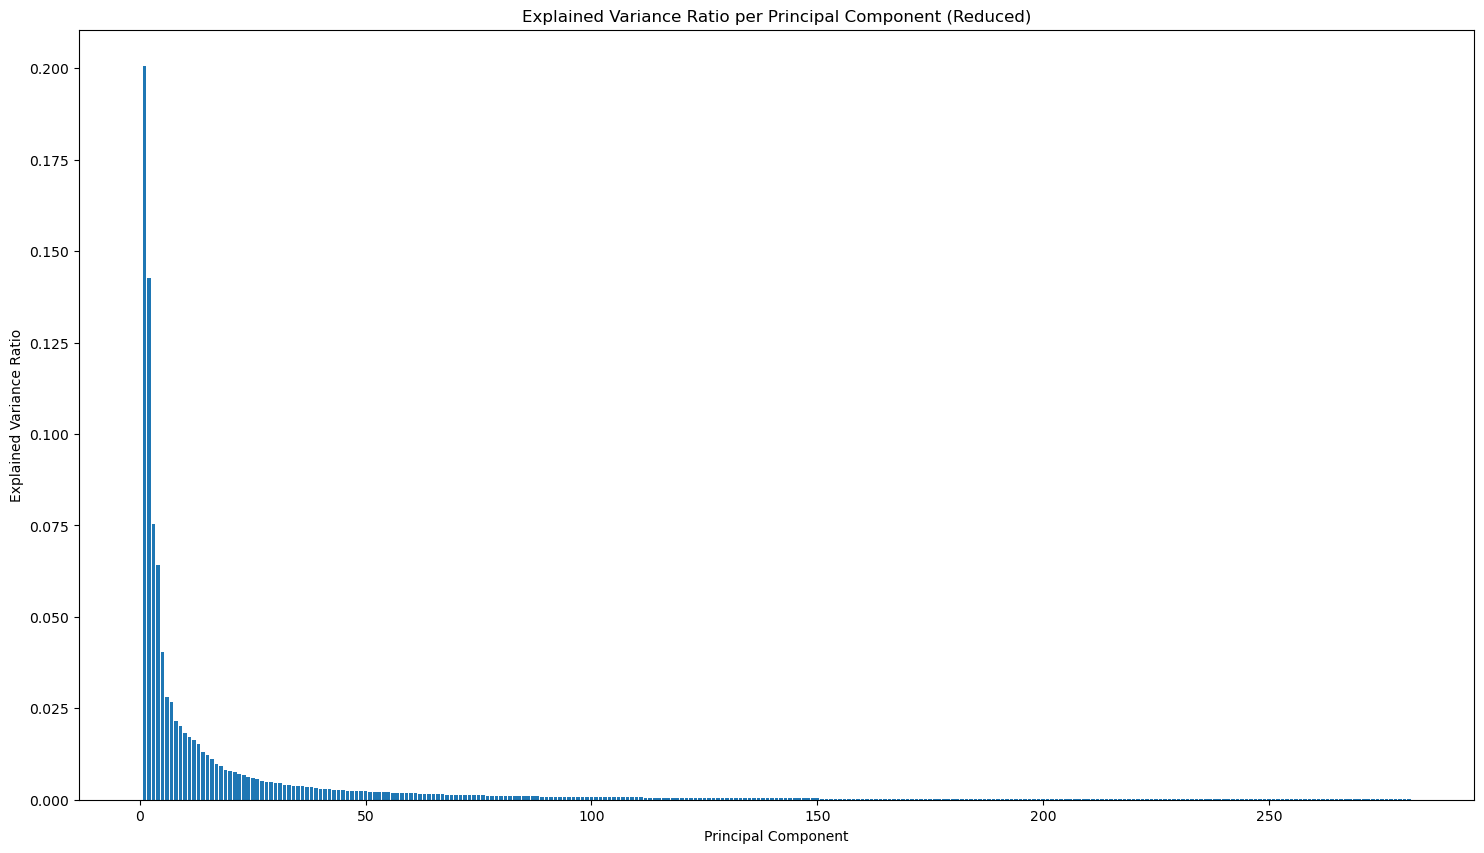


Reduced Train feature matrix shape: (28040, 281)
Reduced valid feature matrix shape: (750, 281)
Reduced test feature matrix shape: (750, 281)


In [31]:
pca_train_features_label2, pca_valid_features_label2, pca_test_features_label2 = apply_PCA(2, standardized_train_features_label2, standardized_valid_features_label2, standardized_test_features_label2, 0.99)

In [32]:
# svm_grid_params, knn_grid_params, random_forest_grid_params = get_hyper_params()
# tune_hyper_params(svm_grid_params, knn_grid_params, random_forest_grid_params, pca_train_features_label2, train_label2, rand=True)

In [33]:
model2 = train_model(2, standardized_train_features_label2, train_label2, standardized_valid_features_label2, valid_label2, SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced'))

SVM is training for 768 number of features



In [34]:
y_pred_test_label2 = get_test_result(standardized_train_features_label2, train_label2, standardized_test_features_label2, model2[0])

In [ ]:
destination = '/home/dakshina/Documents/MLProject/results/2.csv'

create_csv(test_IDs, y_pred_test_label2, destination)

# Label 03

Train set shape before: (28520, 769)
Null value counts of the features
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_764    0
feature_765    0
feature_766    0
feature_767    0
feature_768    0
Length: 768, dtype: int64
Null value count: 0
Train set shape after: (28520, 769)


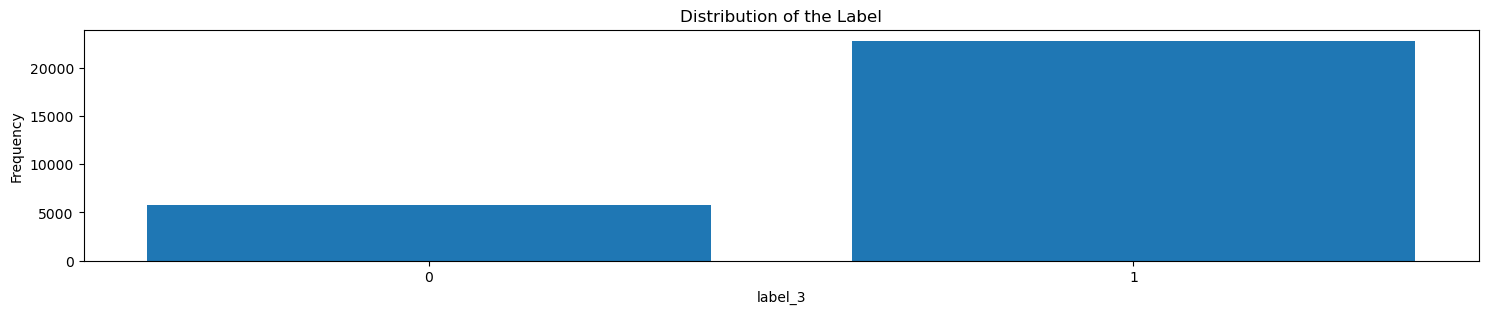

In [35]:
train_data_label3 = clean_null_labels(train_data_label3, 3)
train_data_label3, valid_data_label3, test_data = fill_null_features(train_data_label3, valid_data_label3, test_data)
train_features_label3, train_label3, valid_features_label3, valid_label3, test_features_label3 = split_features_labels(train_data_label3, valid_data_label3, test_data, 3)
plot_label(train_label3, 3)

In [36]:
standardized_train_features_label3, standardized_valid_features_label3, standardized_test_features_label3 = standardize_data(3, train_features_label3, valid_features_label3, test_features_label3, StandardScaler())

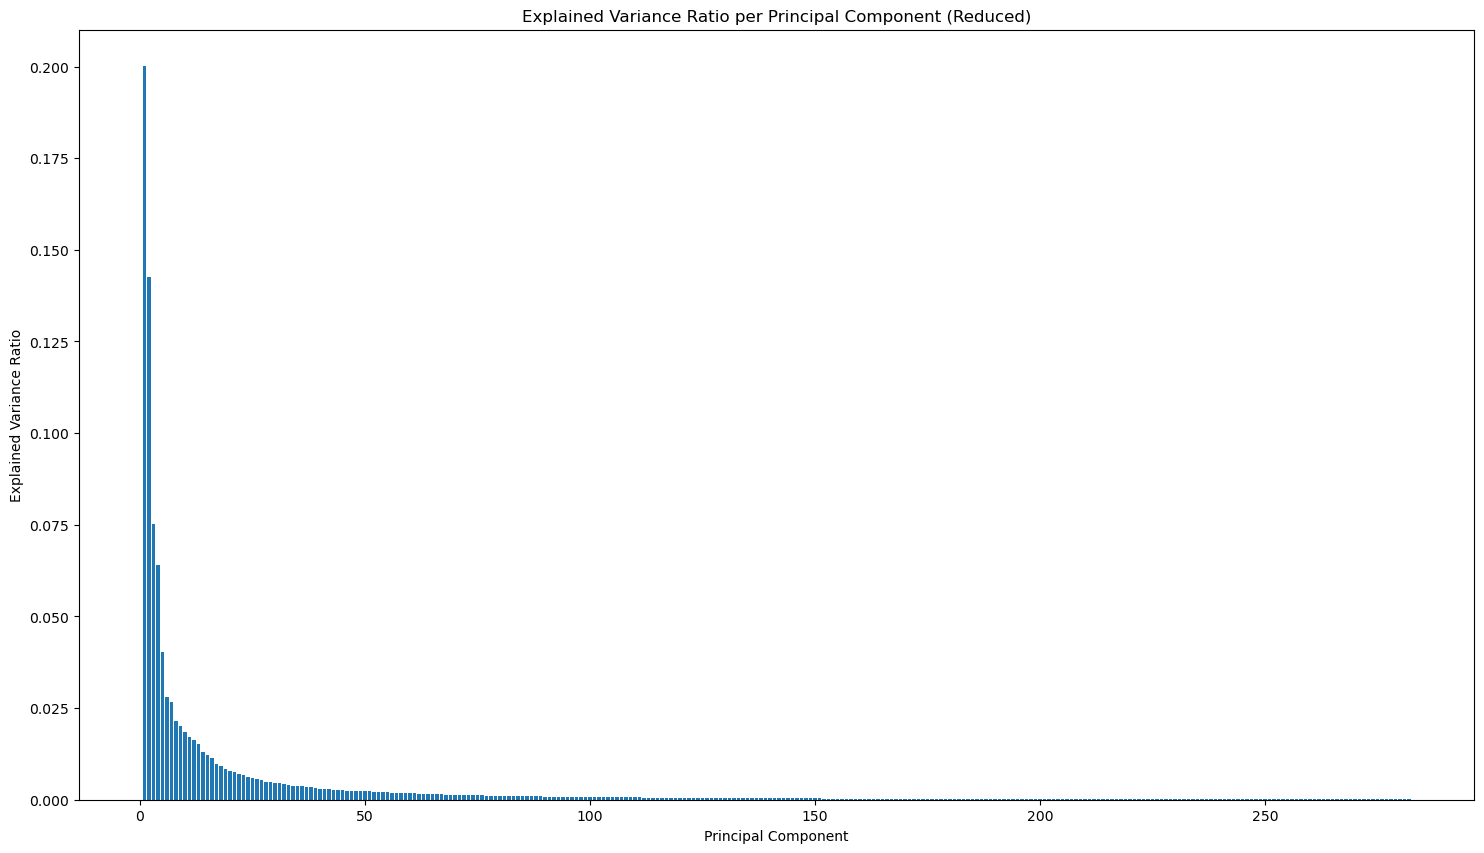


Reduced Train feature matrix shape: (28520, 282)
Reduced valid feature matrix shape: (750, 282)
Reduced test feature matrix shape: (750, 282)


In [37]:
pca_train_features_label3, pca_valid_features_label3, pca_test_features_label3 = apply_PCA(3, standardized_train_features_label3, standardized_valid_features_label3, standardized_test_features_label3, 0.99)

In [38]:
# svm_grid_params, knn_grid_params, random_forest_grid_params = get_hyper_params()
# tune_hyper_params(svm_grid_params, knn_grid_params, random_forest_grid_params, pca_train_features_label3, train_label3, rand=True)

In [39]:
model3 = train_model(3, standardized_train_features_label3, train_label3, standardized_valid_features_label3, valid_label3, SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced'))

SVM is training for 768 number of features



In [40]:
y_pred_test_label3 = get_test_result(standardized_train_features_label3, train_label3, standardized_test_features_label3, model3[0])

In [ ]:
destination = '/home/dakshina/Documents/MLProject/results/3.csv'

create_csv(test_IDs, y_pred_test_label3, destination)

# Label 04

Train set shape before: (28520, 769)
Null value counts of the features
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_764    0
feature_765    0
feature_766    0
feature_767    0
feature_768    0
Length: 768, dtype: int64
Null value count: 0
Train set shape after: (28520, 769)


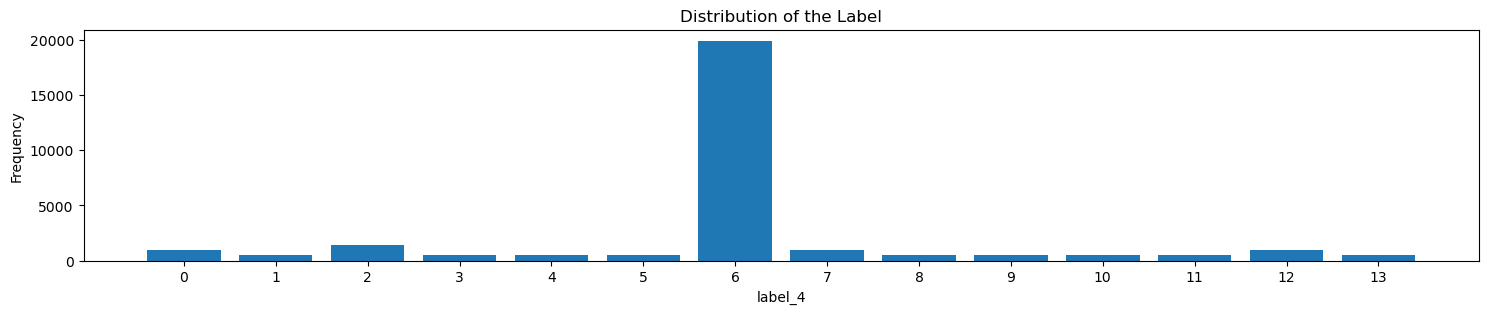

In [41]:
train_data_label4 = clean_null_labels(train_data_label4, 4)
train_data_label4, valid_data_label4, test_data = fill_null_features(train_data_label4, valid_data_label4, test_data)
train_features_label4, train_label4, valid_features_label4, valid_label4, test_features_label4 = split_features_labels(train_data_label4, valid_data_label4, test_data, 4)
plot_label(train_label4, 4)

In [42]:
standardized_train_features_label4, standardized_valid_features_label4, standardized_test_features_label4 = standardize_data(4, train_features_label4, valid_features_label4, test_features_label4, StandardScaler())

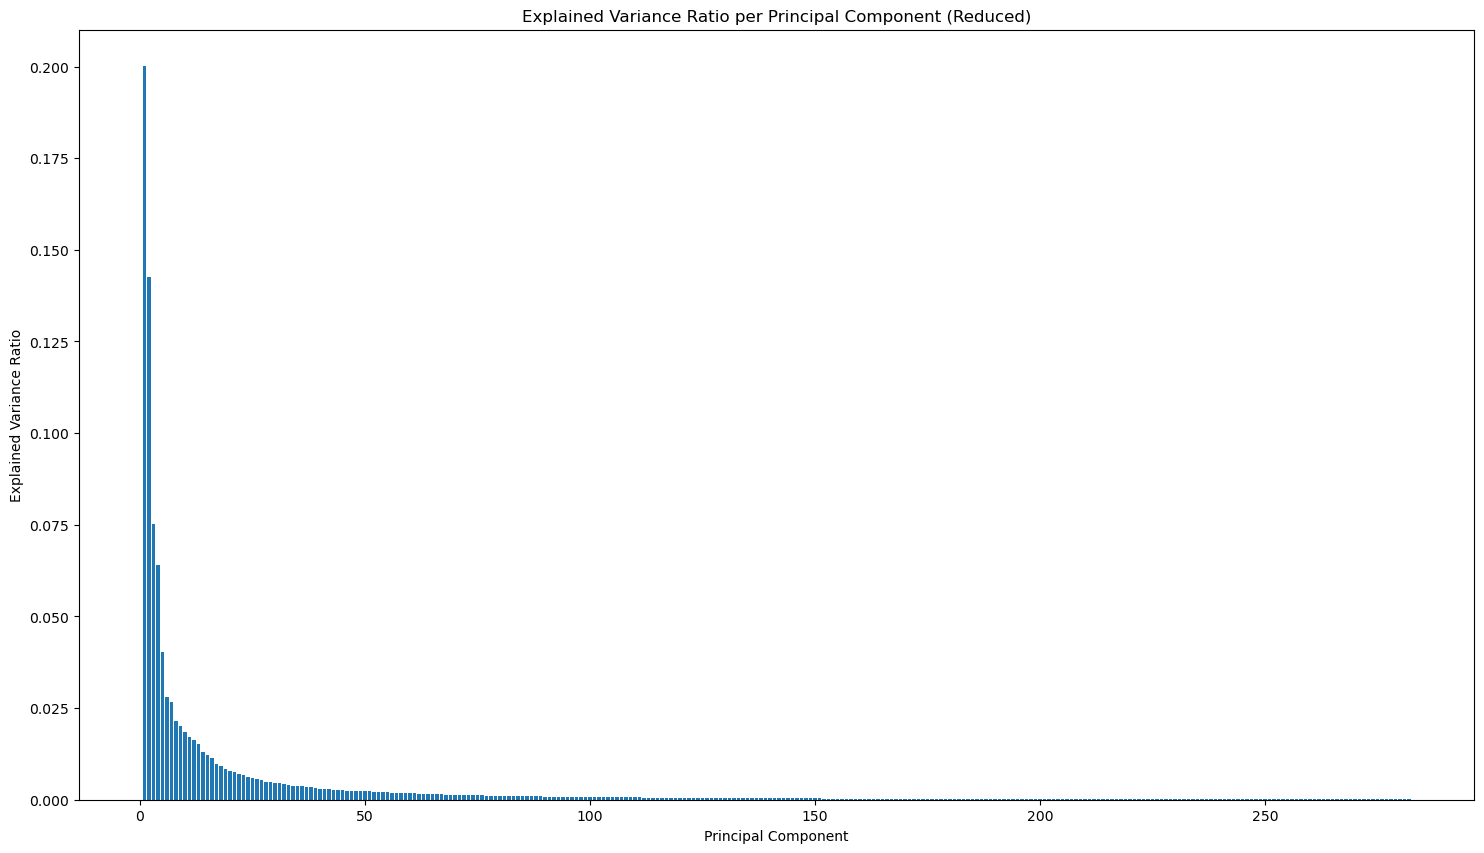


Reduced Train feature matrix shape: (28520, 282)
Reduced valid feature matrix shape: (750, 282)
Reduced test feature matrix shape: (750, 282)


In [43]:
pca_train_features_label4, pca_valid_features_label4, pca_test_features_label4 = apply_PCA(4, standardized_train_features_label4, standardized_valid_features_label4, standardized_test_features_label4, 0.99)

In [44]:
# svm_grid_params, knn_grid_params, random_forest_grid_params = get_hyper_params()
# tune_hyper_params(svm_grid_params, knn_grid_params, random_forest_grid_params, pca_train_features_label4, train_label4, rand=True)

In [45]:
model4 = train_model(4, standardized_train_features_label4, train_label4, standardized_valid_features_label4, valid_label4, SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced'))

SVM is training for 768 number of features



In [ ]:
y_pred_test_label4 = get_test_result(standardized_train_features_label4, train_label4, standardized_test_features_label4, model4[0])

In [ ]:
# Check for null values in train dataset
print(f"train_data_label3 shape before : {train_data_label3.shape}")
train_null_counts = train_data_label3.isnull().sum()
print(f"train null counts before : \n{train_null_counts}")

# Drop rows with null values in the target labels for train dataset
train_data_label3 = train_data_label3.dropna(subset=train_data_label3.columns[-1:], how='any')
print(f"train_data_label3 shape after : {train_data_label3.shape}")

In [ ]:
# Fill null values with mean in train dataset
train_data_label2 = train_data_label2.fillna(train_data_label2.mean())

# Fill null values with mean in valid dataset
valid_data_label2 = valid_data_label2.fillna(valid_data_label2.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

In [ ]:
train_features_label2 = train_data_label2.iloc[:, :-1]
train_label2 = train_data_label2.iloc[:, -1].astype('int64')

valid_features_label2 = valid_data_label2.iloc[:, :-1]
valid_label2 = valid_data_label2.iloc[:, -1].astype('int64')

test_features_label2 = test_data

In [ ]:
# Plotting the distribution of train_label2
labels, counts = np.unique(train_label2, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 2')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 2')
plt.show()

In [ ]:
# # Create an instance of the RandomOverSampler
# over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# # Create an instance of the RandomUnderSampler
# under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# # Create a pipeline that first applies over-sampling and then under-sampling
# sampling_pipeline = Pipeline([
#     ('over_sampling', over_sampler),
#     ('under_sampling', under_sampler)
# ])

# train_features_label2, train_label2 = sampling_pipeline.fit_resample(train_features_label2, train_label2)

In [ ]:
# Plotting the distribution of train_label2
labels, counts = np.unique(train_label2, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 2')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 2')
plt.show()

In [ ]:
# Standardize the features
scaler = RobustScaler()
standardized_train_features_label2 = scaler.fit_transform(train_features_label2)
standardized_valid_features_label2 = scaler.transform(valid_features_label2)
standardized_test_features_label2 = scaler.transform(test_features_label2)

In [ ]:
variance_threshold = 0.98

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_features_label2 = pca.fit_transform(standardized_train_features_label2)
pca_valid_features_label2 = pca.transform(standardized_valid_features_label2)
pca_test_features_label2 = pca.transform(standardized_test_features_label2)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_features_label2.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_features_label2.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label2.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_features_label2.shape))

In [ ]:
#Calculate the correlation matrix
correlation_matrix = pd.DataFrame(pca_train_features_label2).corr()

mask = np.triu(np.ones_like(correlation_matrix))

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Set the threshold for correlation
correlation_threshold = 0.8

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

In [ ]:
# Remove highly correlated features
pca_train_features_label2 = pd.DataFrame(pca_train_features_label2).drop(columns=highly_correlated)
pca_valid_features_label2 = pd.DataFrame(pca_valid_features_label2).drop(columns=highly_correlated)
pca_test_features_label2 = pd.DataFrame(pca_test_features_label2).drop(columns=highly_correlated)

In [ ]:
# Display the filtered train feature count
print("Filtered train features: {}".format(pca_train_features_label2.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(pca_valid_features_label2.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(pca_test_features_label2.shape))

In [ ]:
# Calculate the correlation matrix between features and train_label1
correlation_with_target = pca_train_features_label2.corrwith(train_label2)

# Set the correlation threshold
correlation_threshold = 0.005

# Select features that meet the correlation threshold
highly_correlated_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold]

print(highly_correlated_features)

In [ ]:
# Drop the features with low correlated in train data
pca_train_features_label2 = pca_train_features_label2[highly_correlated_features.index]

# Drop the features with low correlated in valid data
pca_valid_features_label2 = pca_valid_features_label2[highly_correlated_features.index]

# Drop the features with low correlated in test data
pca_test_features_label2 = pca_test_features_label2[highly_correlated_features.index]

In [ ]:
# Display the filtered train feature count
print("Filtered train features: {}".format(pca_train_features_label2.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(pca_valid_features_label2.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(pca_test_features_label2.shape))

In [ ]:
knn_grid_params = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming']
}

rf_grid_params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

svm_grid_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear'],
    'class_weight': ['balanced', None]
}

In [ ]:
classification_models_params = [
#     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
#     ('Random Forest', RandomForestClassifier(), rf_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    print(grid_params)
    grid_search = HalvingGridSearchCV(
        estimator=model,
        param_grid=grid_params,
        cv=3,
        n_jobs=-1,
        verbose=2
    )
#     random_search = RandomizedSearchCV(
#         estimator = model,
#         param_distributions = grid_params,
#         n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
#     )

    result = grid_search.fit(pca_train_features_label2, train_label2)

    print(f"best score for {model_name} : {result.best_score_}")
    print(f"best hyper parameters for {model_name} : {result.best_params_}")

In [ ]:
classification_models = [
    # ('K Neighbors', KNeighborsClassifier(metric='minkowski', n_neighbors=5, weights='distance')),
    # ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(C=10, gamma=0.001, kernel='rbf', class_weight= 'balanced')),
]

# The best model is SVM then KNN then Random Forest

num_features = pca_train_features_label2.shape[1]
print(f"SVM is training for {num_features} number of features\n")

for model_name, model in classification_models:
    model.fit(pca_train_features_label2, train_label2)

    y_pred_train_label2 = model.predict(pca_train_features_label2)

    accuracy = accuracy_score(train_label2, y_pred_train_label2)
    precision = precision_score(train_label2, y_pred_train_label2, average='macro', zero_division=1)
    recall = recall_score(train_label2, y_pred_train_label2, average='macro')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    y_pred_valid_label2 = model.predict(pca_valid_features_label2)

    accuracy = accuracy_score(valid_label2, y_pred_valid_label2)
    precision = precision_score(valid_label2, y_pred_valid_label2, average='weighted', zero_division=1)
    recall = recall_score(valid_label2, y_pred_valid_label2, average='weighted')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\n")

In [ ]:
 y_pred_test_label2 = model.predict(pca_test_features_label2)

In [ ]:
# Check for null values in train dataset
print(f"train_data_label3 shape before : {train_data_label3.shape}")
train_null_counts = train_data_label3.isnull().sum()
print(f"train null counts before : \n{train_null_counts}")

# Drop rows with null values in the target labels for train dataset
train_data_label3 = train_data_label3.dropna(subset=train_data_label3.columns[-1:], how='any')
print(f"train_data_label3 shape after : {train_data_label3.shape}")

In [ ]:
# Fill null values with mean in train dataset
train_data_label3 = train_data_label3.fillna(train_data_label3.mean())

# Fill null values with mean in valid dataset
valid_data_label3 = valid_data_label3.fillna(valid_data_label3.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

In [ ]:
train_features_label3 = train_data_label3.iloc[:, :-1]
train_label3 = train_data_label3.iloc[:, -1]

valid_features_label3 = valid_data_label3.iloc[:, :-1]
valid_label3 = valid_data_label3.iloc[:, -1]

test_features_label3 = test_data

In [ ]:
labels, counts = np.unique(train_label3, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 3')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 3')
plt.show()

In [ ]:
# Create an instance of the RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)

# Create an instance of the RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# Create a pipeline that first applies over-sampling and then under-sampling
sampling_pipeline = Pipeline([
    # ('over_sampling', over_sampler),
    ('under_sampling', under_sampler)
])

train_features_label3, train_label3 = sampling_pipeline.fit_resample(train_features_label3, train_label3)

In [ ]:
# Standardize the features
scaler = RobustScaler()
standardized_train_features_label3 = scaler.fit_transform(train_features_label3)
standardized_valid_features_label3 = scaler.transform(valid_features_label3)
standardized_test_features_label3 = scaler.transform(test_features_label3)

In [ ]:
variance_threshold = 0.97

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_features_label3 = pca.fit_transform(standardized_train_features_label3)
pca_valid_features_label3 = pca.transform(standardized_valid_features_label3)
pca_test_features_label3 = pca.transform(standardized_test_features_label3)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_features_label3.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_features_label3.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label3.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_features_label3.shape))

In [ ]:
knn_grid_params = {
    'n_neighbors' : [3, 5, 7],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan']
}

rf_grid_params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

svm_grid_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf','linear']
}

In [ ]:
classification_models_params = [
#     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
#     ('Random Forest', RandomForestClassifier(), rf_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    grid_search = HalvingGridSearchCV(
        estimator=model,
        param_grid=grid_params,
        cv=3,
        n_jobs=-1,
        verbose=2
    )
#     random_search = RandomizedSearchCV(
#         estimator = model,
#         param_distributions = grid_params,
#         n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
#     )

    result = grid_search.fit(pca_train_features_label3, train_label3)

    print(f"best score for {model_name} : {result.best_score_}")
    print(f"best hyper parameters for {model_name} : {result.best_params_}")

In [ ]:
classification_models = [
    ('K Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
]

# The best model is SVM then KNN then Random Forest

# Number of features used in PCA
num_features = pca_train_features_label3.shape[1]
print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    # Train the model on the training data
    model.fit(pca_train_features_label3, train_label3)

    # Predict on the train data
    y_pred_train_label3 = model.predict(pca_train_features_label3)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label3, y_pred_train_label3)
    precision = precision_score(train_label3, y_pred_train_label3, average='macro', zero_division=1)
    recall = recall_score(train_label3, y_pred_train_label3, average='macro')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid_label3 = model.predict(pca_valid_features_label3)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label3, y_pred_valid_label3)
    precision = precision_score(valid_label3, y_pred_valid_label3, average='macro', zero_division=1)
    recall = recall_score(valid_label3, y_pred_valid_label3, average='macro')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test_label3 = model.predict(pca_test_features_label3)

In [ ]:
# Check for null values in train dataset
print(f"train_data_label4 shape before : {train_data_label4.shape}")
train_null_counts = train_data_label4.isnull().sum()
print(f"train null counts before : \n{train_null_counts}")

# Drop rows with null values in the target labels for train dataset
train_data_label4 = train_data_label4.dropna(subset=train_data_label4.columns[-1:], how='any')
print(f"train_data_label4 shape after : {train_data_label4.shape}")

In [ ]:
# Fill null values with mean in train dataset
train_data_label4 = train_data_label4.fillna(train_data_label4.mean())

# Fill null values with mean in valid dataset
valid_data_label4 = valid_data_label4.fillna(valid_data_label4.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

In [ ]:
train_features_label4 = train_data_label4.iloc[:, :-1]
train_label4 = train_data_label4.iloc[:, -1]

valid_features_label4 = valid_data_label4.iloc[:, :-1]
valid_label4 = valid_data_label4.iloc[:, -1]

test_features_label4 = test_data

In [ ]:
labels, counts = np.unique(train_label4, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 4')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 4')
plt.show()

In [ ]:
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Create an instance of the RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Create a pipeline that first applies over-sampling and then under-sampling
sampling_pipeline = Pipeline([
    ('over_sampling', over_sampler),
    ('under_sampling', under_sampler)
])

train_features_label4, train_label4 = sampling_pipeline.fit_resample(train_features_label4, train_label4)

In [ ]:
scaler = RobustScaler()
standardized_train_features_label4 = scaler.fit_transform(train_features_label4)
standardized_valid_features_label4 = scaler.transform(valid_features_label4)
standardized_test_features_label4 = scaler.transform(test_features_label4)

In [ ]:
variance_threshold = 0.97

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_features_label4 = pca.fit_transform(standardized_train_features_label4)
pca_valid_features_label4 = pca.transform(standardized_valid_features_label4)
pca_test_features_label4 = pca.transform(standardized_test_features_label4)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_features_label4.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_features_label4.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label4.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_features_label4.shape))

In [ ]:
knn_grid_params = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming']
}

rf_grid_params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

svm_grid_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear']
}

In [ ]:
classification_models_params = [
#     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
#     ('Random Forest', RandomForestClassifier(), rf_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    grid_search = HalvingGridSearchCV(
        estimator=model,
        param_grid=grid_params,
        cv=3,
        n_jobs=-1,
        verbose=2
    )
#     random_search = RandomizedSearchCV(
#         estimator = model,
#         param_distributions = grid_params,
#         n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
#     )

    result = grid_search.fit(pca_train_features_label4, train_label4)

    print(f"best score for {model_name} : {result.best_score_}")
    print(f"best hyper parameters for {model_name} : {result.best_params_}")

In [ ]:
classification_models = [
    # ('K Neighbors', KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance')),
    # ('Random Forest', RandomForestClassifier()),
    # ('SVM', SVC(C=10, gamma=0.001, kernel='rbf')),
]

# The best model is SVM then KNN then Random Forest

# Number of features used in PCA
num_features = pca_train_features_label4.shape[1]
print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    # Train the model on the training data
    model.fit(pca_train_features_label4, train_label4)

    # Predict on the train data
    y_pred_train_label4 = model.predict(pca_train_features_label4)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label4, y_pred_train_label4)
    precision = precision_score(train_label4, y_pred_train_label4, average='macro', zero_division=1)
    recall = recall_score(train_label4, y_pred_train_label4, average='macro')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid_label4 = model.predict(pca_valid_features_label4)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label4, y_pred_valid_label4)
    precision = precision_score(valid_label4, y_pred_valid_label4, average='macro', zero_division=1)
    recall = recall_score(valid_label4, y_pred_valid_label4, average='macro')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test_label4 = model.predict(pca_test_features_label4)

In [ ]:
# define method to create the dataframe and save it as a csv file
def create_csv(ID, pred_label1, pred_label2, pred_label3, pred_label4, destination):
  df = pd.DataFrame()

  df.insert(loc=0, column='ID', value=ID)
  df.insert(loc=1, column='label_1', value=pred_label1)
  df.insert(loc=2, column='label_2', value=pred_label2)
  df.insert(loc=3, column='label_3', value=pred_label3)
  df.insert(loc=4, column='label_4', value=pred_label4)

  df.to_csv(destination, index=False)

In [ ]:
destination = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer07\\Results\\190429G.csv'

# create the csv output file
create_csv(ID, y_pred_test_label1, y_pred_test_label2, y_pred_test_label3, y_pred_test_label4, destination)